<h1><b style="color:rgb(10,151,23);"> Beginner Project: 2

<h2><b> Salary Estimation | K-Nearest Neighbour Model

<h3 style="color:maroon;"><li><u> Import Libraries

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

<h3 style="color:maroon;"><li><u> Import Dataset

In [255]:
salary_df = pd.read_csv("salary.csv")
salary_df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


<h3 style="color:maroon;"><li><u> Summarise Dataset

In [258]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [260]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


<h3 style="color:maroon;"><li><u> Mapping Salary Data to Binary Value

In [263]:
salary_df['income']=salary_df['income'].map({'<=50K':0, '>50K':1}).astype(int)

In [265]:
salary_df

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
...,...,...,...,...,...
32556,22,10,0,40,0
32557,27,12,0,38,0
32558,40,9,0,40,1
32559,58,9,0,40,0


<h3 style="color:maroon;"><li><u>Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)

In [268]:
X = salary_df.iloc[:,:4].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [270]:
Y = salary_df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

<h3 style="color:maroon;"><li><u> Splitting Dataset into Train & Test

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

<h3 style="color:maroon;"><li><u> Feature Scaling</u></li></h3>
<li>we scale our data to make all the features contribute equally to the result
Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
<li>Transform - Transform method is transforming all the features using the respective mean and variance, 
We want our test data to be a completely new and a surprise set for our model

In [276]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

<h3 style="color:maroon;"><li><u> Finding the Best K Value

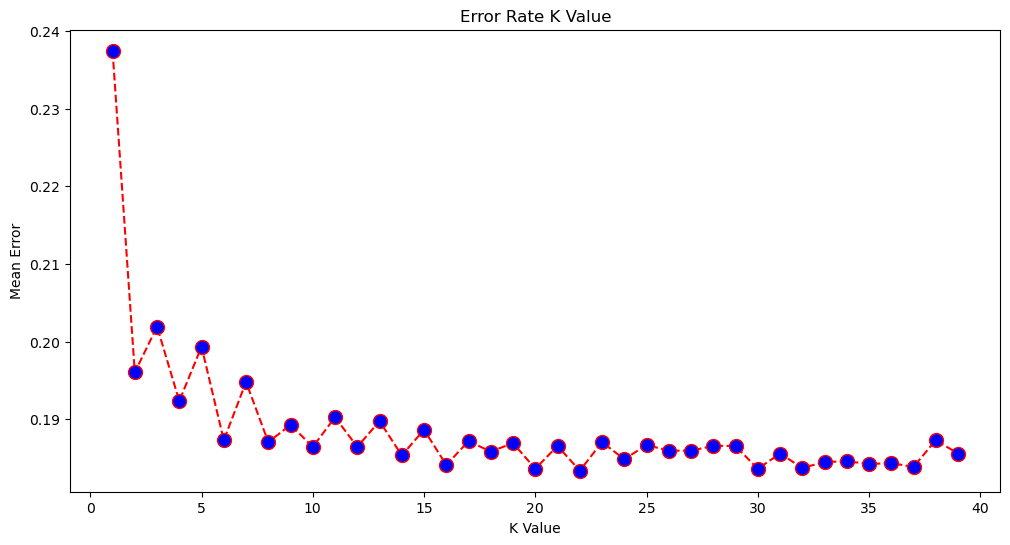

In [279]:
error =[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#Calculating error for K values between 1 and 40
for i in range (1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

<h3 style="color:maroon;"><li><u> Training

In [281]:
model =KNeighborsClassifier(n_neighbors = 22, metric = 'minkowski', p=2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=22)

<h3 style="color:maroon;"><li><u>Predicting the Income

In [284]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Capital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp =[[age,edu,cg,wh]]
result = model.predict(Sc.transform(newEmp))

if result ==1:
    print("Employees might got Salary above 50K")
else:
    print("Employees might not got Salary above 50K")

Enter New Employee's Age:  26
Enter New Employee's Education:  10
Enter New Employee's Capital Gain:  0
Enter New Employee's Hour's Per week:  54


Employees might not got Salary above 50K


In [286]:
y_pred = model.predict(X_test)

<h3 style="color:maroon;"><li><u> Evaluating Model

In [296]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print("Confusion Metrix: \n",cm)
print("Accuracy of the model: ", accuracy_score(y_test,y_pred)*100)

Confusion Metrix: 
 [[5889  304]
 [1189  759]]
Accuracy of the model:  81.66072964009335
